In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\Faizal\AppData\Local\Temp\ipykernel_6292\991426916.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette='Set2')


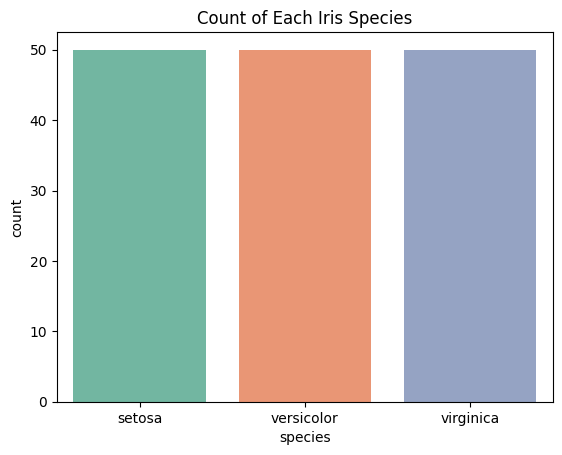

In [4]:
sns.countplot(x='species', data=df, palette='Set2')
plt.title("Count of Each Iris Species")
plt.show()

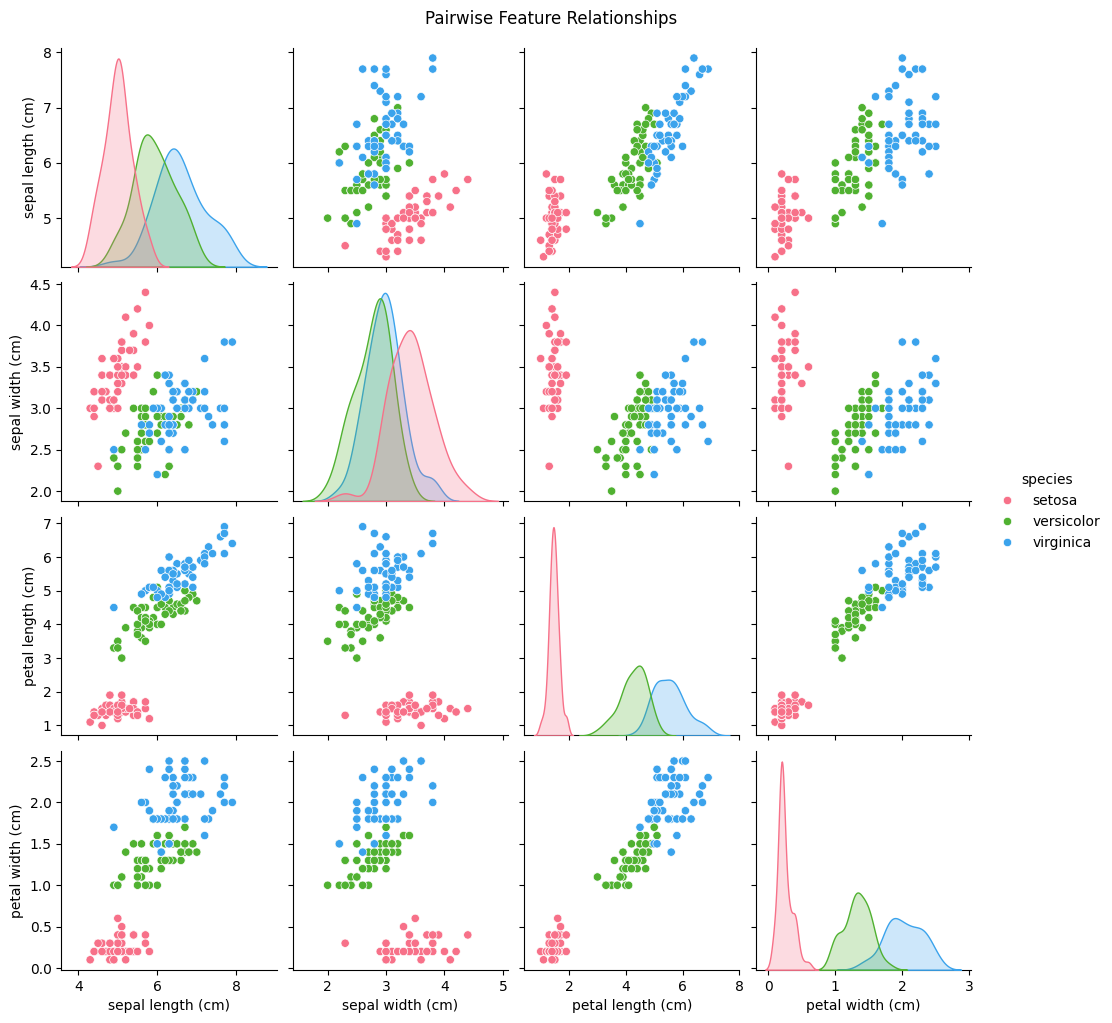

In [5]:
sns.pairplot(df, hue='species', palette='husl')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

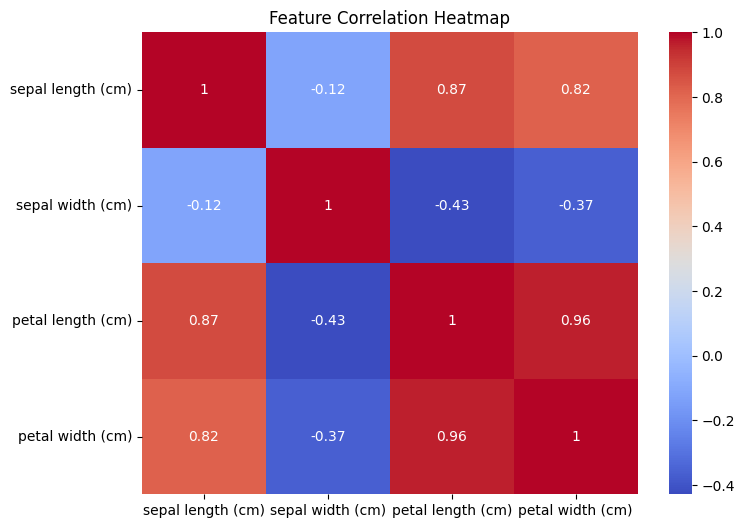

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
X = df.drop('species', axis=1)
y = df['species']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (120, 4)
Testing size: (30, 4)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_preds)
print("Logistic Regression Accuracy:", round(log_acc * 100, 2), "%")

Logistic Regression Accuracy: 100.0 %


In [10]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)
tree_acc = accuracy_score(y_test, tree_preds)
print("Decision Tree Accuracy:", round(tree_acc * 100, 2), "%")

Decision Tree Accuracy: 100.0 %


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, knn_preds)
print("KNN Accuracy (k=3):", round(knn_acc * 100, 2), "%")

KNN Accuracy (k=3): 100.0 %


In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

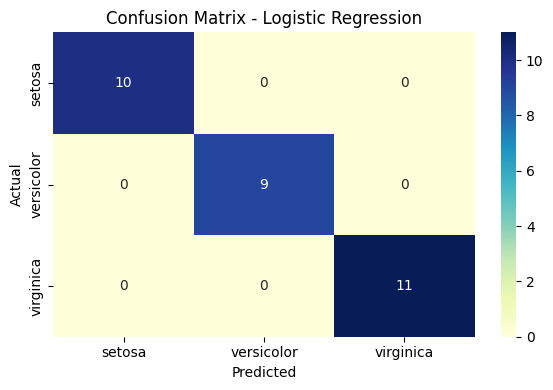

Logistic Regression Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



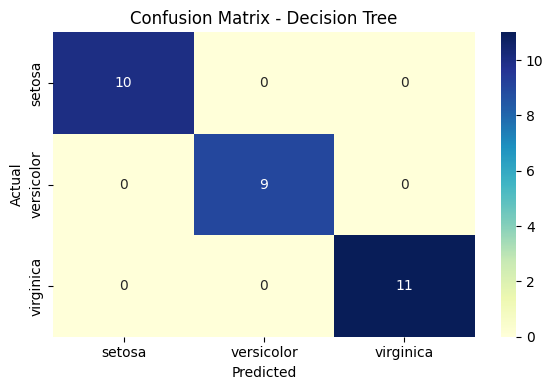

Decision Tree Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



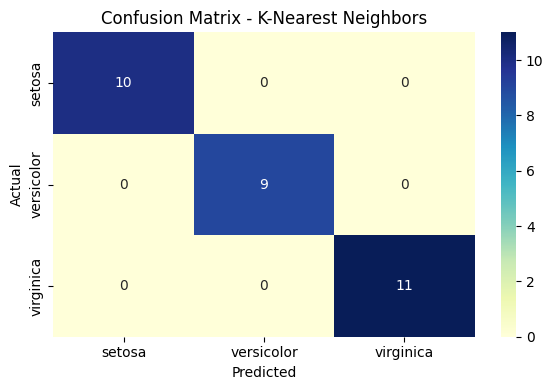

KNN Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
plot_conf_matrix(y_test, log_preds, "Logistic Regression")
print("Logistic Regression Report:\n", classification_report(y_test, log_preds))
plot_conf_matrix(y_test, tree_preds, "Decision Tree")
print("Decision Tree Report:\n", classification_report(y_test, tree_preds))
plot_conf_matrix(y_test, knn_preds, "K-Nearest Neighbors")
print("KNN Report:\n", classification_report(y_test, knn_preds))

In [17]:
new_input = [[5.1, 3.5, 1.4, 0.2]]
prediction = log_model.predict(new_input)
print("Predicted Species:", prediction[0])

Predicted Species: setosa


C:\Users\Faizal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [19]:
sl = float(input("Enter Sepal Length: "))
sw = float(input("Enter Sepal Width: "))
pl = float(input("Enter Petal Length: "))
pw = float(input("Enter Petal Width: "))
user_input = [[sl, sw, pl, pw]]
predicted_class = log_model.predict(user_input)
print("Predicted Iris Species:", predicted_class[0])

Enter Sepal Length:  6.9
Enter Sepal Width:  5.1
Enter Petal Length:  5.4
Enter Petal Width:  2.1


Predicted Iris Species: virginica


C:\Users\Faizal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
